# 1. 길드와 존속 간 관계 파악	

### 1. week 라벨에서도 복수의 길드 이력이 수백명. 이 게임은 길드란게 무엇인가?
### 2. 이탈그룹(week, month, 2month) 내에서는 count의 변화 불규칙
### 3. 분수에 맞지 않게 길드를 많이 옮겨다닌 이들 업자로 의심 가능

In [0]:
# 구글드라이브와 연동하기 위한 셋팅
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_id = ''
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('tr_label_w_guild.csv')

In [0]:
import pandas as pd
tr_label_w_guild = pd.read_csv('tr_label_w_guild.csv')
tr_label_w_guild.head()

,acc_id,label,guild_factor,count,joined_guild_id
0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week,0,0,0
1,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,0,0,0
2,acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...,week,0,0,0
3,34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...,week,0,0,0
4,26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...,week,0,0,0


In [0]:
tr_label_w_guild['guild_factor'] = tr_label_w_guild['guild_factor'].astype('category')
tr_label_w_guild['label'] = tr_label_w_guild['label'].astype('category')
tr_label_w_guild['joined_guild_id'] = tr_label_w_guild['joined_guild_id'].astype('str')

In [0]:
tr_label_w_guild.dtypes

acc_id               object
label              category
guild_factor       category
count                 int64
joined_guild_id      object
dtype: object

In [0]:
tr_label_w_guild['guild_factor'].value_counts()

0    83264
1    16736
Name: guild_factor, dtype: int64

In [0]:
tr_label_w_guild['label'].value_counts()

week        25000
retained    25000
month       25000
2month      25000
Name: label, dtype: int64

In [0]:
tr_label_w_guild.head()

,acc_id,label,guild_factor,count,joined_guild_id
0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week,0,0,0
1,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,0,0,0
2,acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...,week,0,0,0
3,34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...,week,0,0,0
4,26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...,week,0,0,0


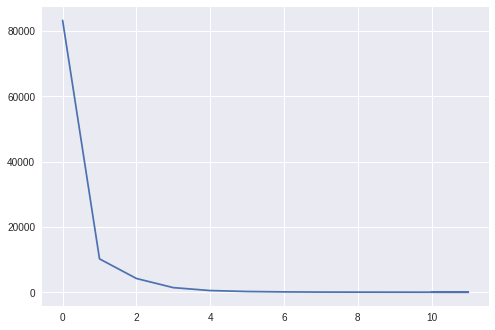

In [0]:
tr_label_w_guild['count'].value_counts().plot()

In [0]:
tr_label_w_guild['count'].value_counts()

0     83264
1     10211
2      4210
3      1404
4       507
5       218
6        98
7        43
8        25
9        15
11        3
10        2
Name: count, dtype: int64

### - 전체 데이터 10만명 중 83% 이상이 길드에 든 적이 없음	
- 길드에 한번이라도 든 적 있는 16736 중 11632 이 'retained'

In [0]:
def bar_plot(var):
  week = tr_label_w_guild[tr_label_w_guild['label'] == 'week'][var].value_counts()
  month = tr_label_w_guild[tr_label_w_guild['label'] == 'month'][var].value_counts()
  two_month = tr_label_w_guild[tr_label_w_guild['label'] == '2month'][var].value_counts()
  retained = tr_label_w_guild[tr_label_w_guild['label'] == 'retained'][var].value_counts()
  df = pd.DataFrame([week, month, two_month, retained])
  df.index = ['week', 'month', 'two_month', 'retained']
  df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

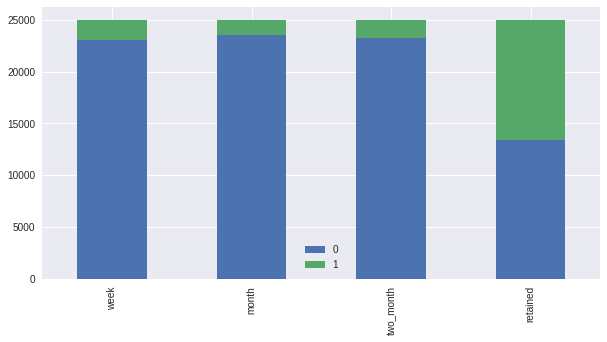

In [0]:
bar_plot('guild_factor')

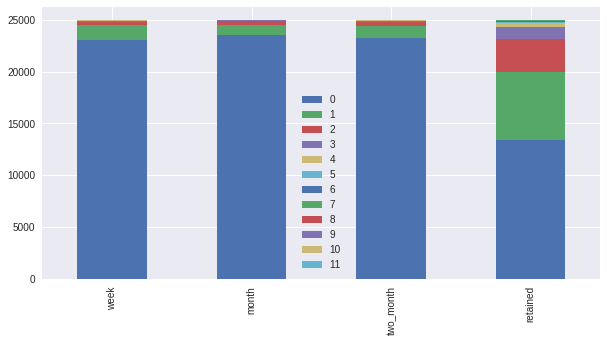

In [0]:
bar_plot('count')

### - 이탈자 vs 비이탈자 관점으로 바라보면 길드 가입여부가 확연히 차이남. 
### - 특히 retained 집단에서 47% 가량이 1번 이상의 길드 가입이력을 갖고 있음

In [0]:
tr_label_w_guild.groupby('label')['count'].mean()

label
2month      0.10464
month       0.08372
retained    0.79204
week        0.10912
Name: count, dtype: float64

In [0]:
df_1 = pd.DataFrame([tr_label_w_guild[tr_label_w_guild['label'] == 'week']['count'].value_counts(),
                     (tr_label_w_guild[tr_label_w_guild['label'] == 'week']['count'].value_counts() / 25000) * 100,
                   tr_label_w_guild[tr_label_w_guild['label'] == 'month']['count'].value_counts(),
                     (tr_label_w_guild[tr_label_w_guild['label'] == 'month']['count'].value_counts() / 25000) * 100,
                   tr_label_w_guild[tr_label_w_guild['label'] == '2month']['count'].value_counts(),
                     (tr_label_w_guild[tr_label_w_guild['label'] == '2month']['count'].value_counts() / 25000) * 100,
                   tr_label_w_guild[tr_label_w_guild['label'] == 'retained']['count'].value_counts(),
                     (tr_label_w_guild[tr_label_w_guild['label'] == 'retained']['count'].value_counts() / 25000) * 100])


df_1.index = ['week_n', 'week_%', 'month_n', 'month_%', 'two_month_n', 'two_month_%', 'retained_n', 'retained_%']
df_1.transpose()

,week_n,week_%,month_n,month_%,two_month_n,two_month_%,retained_n,retained_%
0,23072.0,92.288,23583.0,94.332,23241.0,92.964,13368.0,53.472
1,1403.0,5.612,974.0,3.896,1205.0,4.820,6629.0,26.516
2,364.0,1.456,293.0,1.172,372.0,1.488,3181.0,12.724
3,96.0,0.384,100.0,0.400,111.0,0.444,1097.0,4.388
4,35.0,0.140,31.0,0.124,37.0,0.148,404.0,1.616
5,20.0,0.080,11.0,0.044,24.0,0.096,163.0,0.652
6,6.0,0.024,4.0,0.016,6.0,0.024,82.0,0.328
7,NaN,NaN,2.0,0.008,2.0,0.008,39.0,0.156
8,3.0,0.012,2.0,0.008,2.0,0.008,18.0,0.072
9,1.0,0.004,NaN,NaN,NaN,NaN,14.0,0.056


1. week 라벨에서도 복수의 길드 이력이 수백명. 이 게임은 길드란게 무엇인가?
2. 이탈그룹(week, month, 2month) 내에서는 count의 변화 불규칙
3. 분수에 맞지 않게 길드를 많이 옮겨다닌 이들 의심 가능

-------

# 2. Trade와 존속 간 관계 파악

### 1. 오히려 판매'SOURCE'는 비이탈 retained 그룹이 확실히 많다. (평균 mean을 비교)
### 2. 이탈 vs 비이탈 그룹을 나누는데 있어서 판매 (source)를 사용할 수 있겠지만, 이탈 그룹 내 3개의 라벨링에서는 불규칙한 변화를 보인다.


In [0]:
file_id = '1007pJXd1CmfL7z8p0Vk34okvCAom0yVj'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train_label_w_trade.csv')

In [0]:
import pandas as pd
tr_label_w_trade = pd.read_csv('train_label_w_trade.csv')
tr_label_w_trade.head()

,acc_id,label,target_frequency,source_frequency,trade_factor
0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week,2,4,1
1,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,0,168,1
2,acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...,week,2,4,1
3,34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...,week,0,0,0
4,26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...,week,0,0,0


In [0]:
tr_label_w_trade['t1'] = tr_label_w_trade['target_frequency'] * tr_label_w_trade['source_frequency']

In [0]:
tr_label_w_trade.t1.describe()

count    1.000000e+05
mean     5.218939e+04
std      1.065572e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.347511e+09
Name: t1, dtype: float64

In [0]:
def bar_plot(var):
  week = tr_label_w_trade[tr_label_w_trade['label'] == 'week'][var].value_counts()
  month = tr_label_w_trade[tr_label_w_trade['label'] == 'month'][var].value_counts()
  two_month = tr_label_w_trade[tr_label_w_trade['label'] == '2month'][var].value_counts()
  retained = tr_label_w_trade[tr_label_w_trade['label'] == 'retained'][var].value_counts()
  df = pd.DataFrame([week, month, two_month, retained])
  df.index = ['week', 'month', 'two_month', 'retained']
  df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

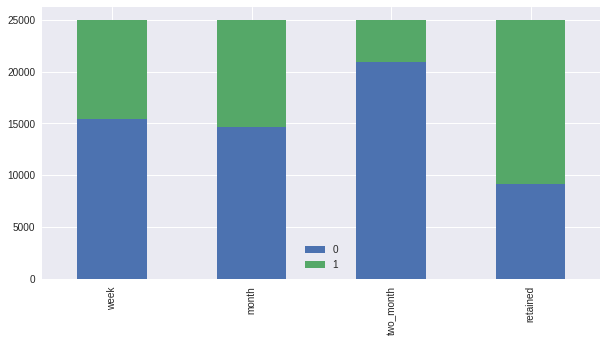

In [0]:
bar_plot('trade_factor')

### 비이탈자 vs 이탈자 관점에서 '거래 경험'은 유의미한 차이를 보인다. 
- retained의 절반 이상이 trade 경험 있음(여기서 trade 경험은 주고(sourcing) 받고(targeted) 모두
- 이탈자 그룹에서는 흠... 5~8주 이탈자를 보면 꼭 거래 경험이 1주, 2~4주 이탈자보다 많은 것은 아니다.
- 사람들이 거래 용도로 부계정을 사용?

In [0]:
df = pd.DataFrame(tr_label_w_trade.groupby('label')['target_frequency'].sum())

In [0]:
df

,target_frequency
label,
2month,1987161
month,2000084
retained,1729849
week,917341


In [0]:
df = df.transpose()

In [0]:
df

label,2month,month,retained,week
target_frequency,1987161,2000084,1729849,917341


In [0]:
df.index = ['sum_of_target_freq']

In [0]:
df = df[['week', 'month', '2month', 'retained']]

In [0]:
df

label,week,month,2month,retained
sum_of_target_freq,917341,2000084,1987161,1729849


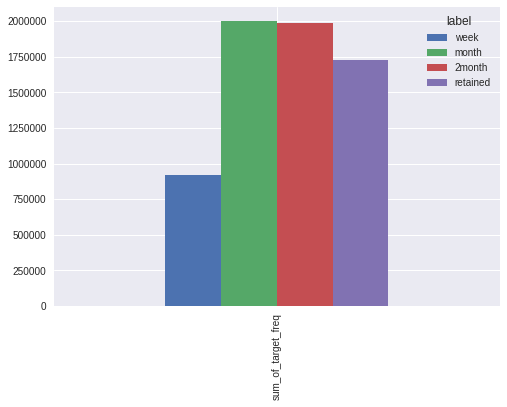

In [0]:
df.plot(kind = 'bar')

## 아이템 거래량 중 받은 거래의 수(구매 수 targeted) 의 라벨그룹별 합을 살펴보면, week를 제외한 나머지 그룹 간 차이가 별로 없다.
- 어떻게보면 이탈그룹 중 mon, 2mon 중에 허수 아이디가 저렇게 많다는 뜻?
- 아래의 '판매' 기록 수와 비교(판매는 오래 존속할 수록 많다 대체로)하면... 아이템을 사려는 용도로 더미 계정을 만든 사람들이 많다? 왜?

In [0]:
df = (pd.DataFrame(tr_label_w_trade.groupby('label')['target_frequency'].describe())).transpose() #받는, 구매 행위

In [0]:
df = df[['week', 'month', '2month', 'retained']]

In [0]:
df

label,week,month,2month,retained
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,36.693640,80.003360,79.486440,69.193960
std,5301.390969,3554.650429,7015.479768,2807.730243
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,28.000000
max,838135.000000,248044.000000,879142.000000,361407.000000


In [0]:
df = (pd.DataFrame(tr_label_w_trade.groupby('label')['source_frequency'].describe())).transpose() #주는, 판매 행위

In [0]:
df = df[['week', 'month', '2month', 'retained']]

In [0]:
df

label,week,month,2month,retained
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,24.707880,64.579480,39.873800,112.084280
std,105.950715,178.550803,196.439218,282.446174
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,10.000000
75%,12.000000,56.000000,0.000000,65.000000
max,5060.000000,8891.000000,5731.000000,4615.000000


### 1. 판매'SOURCE'는 비이탈 retained 그룹이 확실히 많다. (평균 mean을 비교)
### 2. 이탈 vs 비이탈 그룹을 나누는데 있어서 판매 (source)를 사용할 수 있겠지만, 이탈 그룹 내 3개의 라벨링에서는 또 불규칙한 변화를 보인다.


-----------

#3. party와 존속 간 관계 파악

### - party_factor에서는 week 집단의 파티 경험 비율이 retained보다도 높은 구조... <br/> 또한 이탈 그룹 내에서도 month, 2month로 갈수록 경험이 줄어듬...
### - party_frequency는 그나마 이탈 vs 비이탈 구도 측면에서 retained 그룹의 평균치가 높다.
### - 의문점... 첫번째처럼 비이탈 그룹 내 직관과 다른 결과가 나오더라도 마스터 테이블에 사용해야하는가?<br/> 일단 다 넣고?

In [0]:
file_id = '1zbzMfSMlhE7FH6_Y_zs24Ju-JR9SrUr6'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train_label_w_party.csv')

In [3]:
import pandas as pd
tr_label_w_party = pd.read_csv('train_label_w_party.csv')
tr_label_w_party.head()

,acc_id,label,party_frequency,party_factor
0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week,218,1
1,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,203,1
2,acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...,week,157,1
3,34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...,week,0,0
4,26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...,week,57,1


In [4]:
tr_label_w_party.shape

(100000, 4)

In [5]:
tr_label_w_party.describe()

,party_frequency,party_factor
count,100000.000000,100000.00000
mean,138.771360,0.54358
std,317.428912,0.49810
min,0.000000,0.00000
25%,0.000000,0.00000
50%,9.000000,1.00000
75%,161.000000,1.00000
max,31498.000000,1.00000


In [7]:
tr_label_w_party.groupby('label').describe()

party_factor                                              \
                count     mean       std  min  25%  50%  75%  max   
label                                                               
2month        25000.0  0.19192  0.393818  0.0  0.0  0.0  0.0  1.0   
month         25000.0  0.45608  0.498077  0.0  0.0  0.0  1.0  1.0   
retained      25000.0  0.67284  0.469186  0.0  0.0  1.0  1.0  1.0   
week          25000.0  0.85348  0.353634  0.0  1.0  1.0  1.0  1.0   

         party_frequency                                                 \
                   count       mean         std  min   25%   50%    75%   
label                                                                     
2month           25000.0   46.64672  160.400333  0.0   0.0   0.0    0.0   
month            25000.0   96.43472  214.033902  0.0   0.0   0.0   61.0   
retained         25000.0  249.33268  514.682904  0.0   0.0  98.0  404.0   
week             25000.0  162.67132  208.671995  0.0  26.0  89.0  208.0   

                   
              max  
label              
2month     2426.0  
month      2422.0  
retained  31498.0  
week       1740.0

In [0]:
df_3 = tr_label_w_party.groupby('label').describe().transpose()

In [0]:
df_3 = df_3[['week', 'month', '2month', 'retained']]

In [11]:
df_3

label                          week         month        2month      retained
party_factor    count  25000.000000  25000.000000  25000.000000  25000.000000
                mean       0.853480      0.456080      0.191920      0.672840
                std        0.353634      0.498077      0.393818      0.469186
                min        0.000000      0.000000      0.000000      0.000000
                25%        1.000000      0.000000      0.000000      0.000000
                50%        1.000000      0.000000      0.000000      1.000000
                75%        1.000000      1.000000      0.000000      1.000000
                max        1.000000      1.000000      1.000000      1.000000
party_frequency count  25000.000000  25000.000000  25000.000000  25000.000000
                mean     162.671320     96.434720     46.646720    249.332680
                std      208.671995    214.033902    160.400333    514.682904
                min        0.000000      0.000000      0.000000      0.000000
                25%       26.000000      0.000000      0.000000      0.000000
                50%       89.000000      0.000000      0.000000     98.000000
                75%      208.000000     61.000000      0.000000    404.000000
                max     1740.000000   2422.000000   2426.000000  31498.000000

In [0]:
v_0 = tr_label_w_party.groupby('label')['party_factor'].value_counts()

In [0]:
v_0 = pd.DataFrame(v_0)

In [72]:
v_0

party_factor
label    party_factor              
2month   0                    20202
         1                     4798
month    0                    13598
         1                    11402
retained 1                    16821
         0                     8179
week     1                    21337
         0                     3663

In [0]:
# 멀티 index의 재정렬법 https://stackoverflow.com/questions/34029608/reorder-levels-of-multiindex-in-a-pandas-dataframe

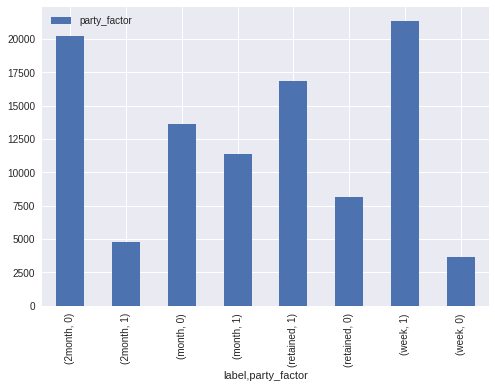

In [55]:
v_0.plot(kind = 'bar')

In [0]:
def bar_plot(var):
  week = tr_label_w_party[tr_label_w_party['label'] == 'week'][var].value_counts()
  month = tr_label_w_party[tr_label_w_party['label'] == 'month'][var].value_counts()
  two_month = tr_label_w_party[tr_label_w_party['label'] == '2month'][var].value_counts()
  retained = tr_label_w_party[tr_label_w_party['label'] == 'retained'][var].value_counts()
  df = pd.DataFrame([week, month, two_month, retained])
  df.index = ['week', 'month', 'two_month', 'retained']
  df.plot(kind = 'bar', stacked = True, figsize = (10, 5))
  df

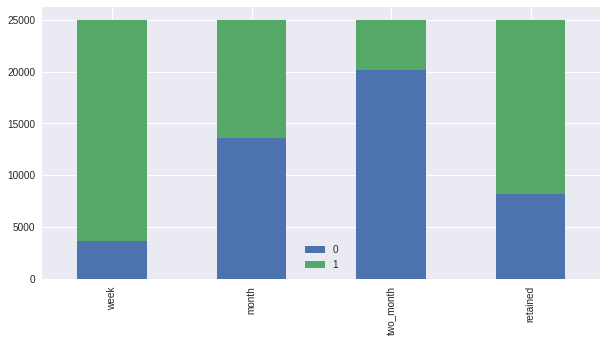

In [60]:
bar_plot('party_factor')

In [0]:
def bar_plot2(var):
  week = tr_label_w_party[tr_label_w_party['label'] == 'week'][var].value_counts()
  month = tr_label_w_party[tr_label_w_party['label'] == 'month'][var].value_counts()
  two_month = tr_label_w_party[tr_label_w_party['label'] == '2month'][var].value_counts()
  retained = tr_label_w_party[tr_label_w_party['label'] == 'retained'][var].value_counts()
  df = pd.DataFrame([week, month, two_month, retained])
  df.index = ['week', 'month', 'two_month', 'retained']
  print(df)

### - 의문점...
- 파티 해본 경험 있는 자들이 week서 가장 많다 우선(retained 보다도.)

In [63]:
bar_plot2('party_factor')

               0      1
week        3663  21337
month      13598  11402
two_month  20202   4798
retained    8179  16821


In [19]:
#party에 참여한적 있는가 없는가의 factor
pd.DataFrame(tr_label_w_party.groupby('label')['party_factor'].mean())

,party_factor
label,
2month,0.19192
month,0.45608
retained,0.67284
week,0.85348


In [0]:
v_1 = pd.DataFrame(tr_label_w_party.groupby('label')['party_factor'].mean())

In [21]:
v_1.transpose()

label,2month,month,retained,week
party_factor,0.19192,0.45608,0.67284,0.85348


In [0]:
v_1 = v_1.transpose()

In [0]:
v_1 = v_1[['week', 'month', '2month', 'retained']]

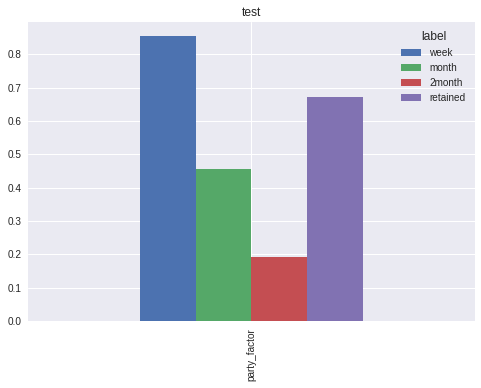

In [25]:
v_1.plot(kind = 'bar', title = '')

In [53]:
v_1.transpose()

,party_factor
label,
week,0.85348
month,0.45608
2month,0.19192
retained,0.67284


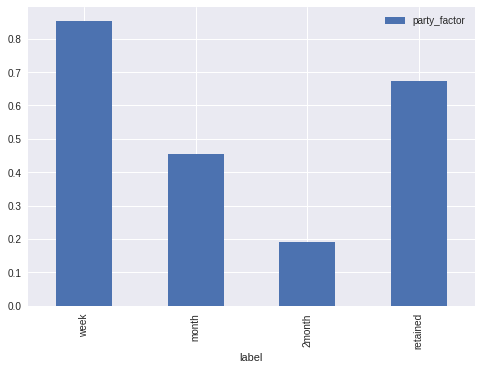

In [54]:
v_1.transpose().plot(kind = 'bar')

In [0]:
# 아래부터 파티에 참여한 횟수(factor 0, 1이 아닌)

In [66]:
tr_label_w_party.groupby('label').party_frequency.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
2month,25000.0,46.64672,160.400333,0.0,0.0,0.0,0.0,2426.0
month,25000.0,96.43472,214.033902,0.0,0.0,0.0,61.0,2422.0
retained,25000.0,249.33268,514.682904,0.0,0.0,98.0,404.0,31498.0
week,25000.0,162.67132,208.671995,0.0,26.0,89.0,208.0,1740.0


In [0]:
v_2 = tr_label_w_party.groupby('label').party_frequency.describe()

In [0]:
v_2 = v_2.loc[['week', 'month', '2month', 'retained'], :]

In [69]:
v_2

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
week,25000.0,162.67132,208.671995,0.0,26.0,89.0,208.0,1740.0
month,25000.0,96.43472,214.033902,0.0,0.0,0.0,61.0,2422.0
2month,25000.0,46.64672,160.400333,0.0,0.0,0.0,0.0,2426.0
retained,25000.0,249.33268,514.682904,0.0,0.0,98.0,404.0,31498.0


In [70]:
v_2.transpose()

label,week,month,2month,retained
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,162.671320,96.434720,46.646720,249.332680
std,208.671995,214.033902,160.400333,514.682904
min,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000
50%,89.000000,0.000000,0.000000,98.000000
75%,208.000000,61.000000,0.000000,404.000000
max,1740.000000,2422.000000,2426.000000,31498.000000


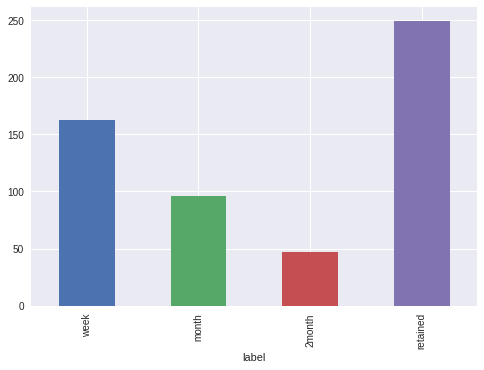

In [71]:
v_2.transpose().loc['mean'].plot(kind = 'bar')

- 확실히 이탈 vs 비이탈 구도에서 retained 집단의 평균 파티 참여 횟수가 높다.
- 하지만 비이탈 그룹 내에서 직관과는 다른 결과를 드러낸다. 다 2.5만명인데 장기체류자 평균이 왜 줄어드는가?


### - party_factor에서는 week 집단의 파티 경험 비율이 retained보다도 높은 구조... <br/> 또한 이탈 그룹 내에서도 month, 2month로 갈수록 경험이 줄어듬...
### - party_frequency는 그나마 이탈 vs 비이탈 구도 측면에서 retained 그룹의 평균치가 높다.
### - 의문점... 첫번째처럼 비이탈 그룹 내 직관과 다른 결과가 나오더라도 마스터 테이블에 사용해야하는가?<br/> 일단 다 넣고?

---------

# 4. Payment
### - factor, total, @8week 모두 직관과 일치한 경향(장기 존속일수록 지출 평균, 경험 up)
### - 허나 이탈 그룹 내 3 라벨링 간 차이가 유의한가는 두고 봐야...

In [0]:
file_id = '1MJnJm5m3ItFkCDybCn0sbhdB3gV-UOTs'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train_label_w_payment.csv')

In [20]:
import pandas as pd
tr_label_w_payment = pd.read_csv('tr_label_w_payment.csv')
tr_label_w_payment.head()

,Unnamed: 0,acc_id,label,payment_amount_total,payment_amount_at_8,payment_factor
0,0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week,-1.199188,-0.149898,0
1,1,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,-1.199188,-0.149898,0
2,2,acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...,week,-1.199188,-0.149898,0
3,3,34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...,week,42.746137,17.428232,1
4,4,26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...,week,-1.199188,-0.149898,0


In [0]:
tr_label_w_payment = tr_label_w_payment.drop(['Unnamed: 0'], axis = 1)

In [22]:
tr_label_w_payment.head()

,acc_id,label,payment_amount_total,payment_amount_at_8,payment_factor
0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week,-1.199188,-0.149898,0
1,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,-1.199188,-0.149898,0
2,acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...,week,-1.199188,-0.149898,0
3,34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...,week,42.746137,17.428232,1
4,26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...,week,-1.199188,-0.149898,0


In [23]:
tr_label_w_payment.describe()

,payment_amount_total,payment_amount_at_8,payment_factor
count,100000.000000,100000.000000,100000.000000
mean,-0.000979,0.042301,0.123020
std,4.763623,1.134096,0.328462
min,-1.199188,-0.149898,0.000000
25%,-1.199188,-0.149898,0.000000
50%,-1.199188,-0.149898,0.000000
75%,-1.199188,-0.149898,0.000000
max,51.535202,32.510267,1.000000


In [0]:
def bar_plot(var):
  week = tr_label_w_payment[tr_label_w_payment['label'] == 'week'][var].value_counts()
  month = tr_label_w_payment[tr_label_w_payment['label'] == 'month'][var].value_counts()
  two_month = tr_label_w_payment[tr_label_w_payment['label'] == '2month'][var].value_counts()
  retained = tr_label_w_payment[tr_label_w_payment['label'] == 'retained'][var].value_counts()
  df = pd.DataFrame([week, month, two_month, retained])
  df.index = ['week', 'month', 'two_month', 'retained']
  df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

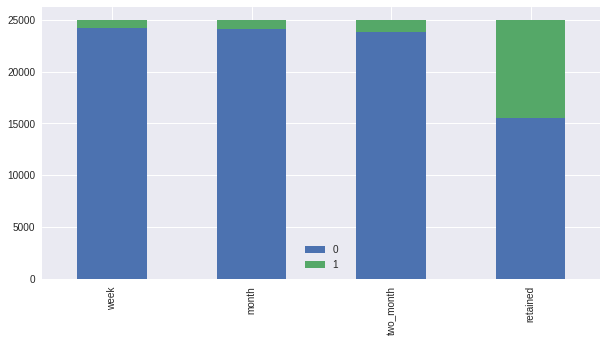

In [31]:
bar_plot('payment_factor')

## 장기 존속 집단일수록 payment 경험이 높다

In [35]:
tr_label_w_payment.groupby('label')['payment_factor'].value_counts()

label     payment_factor
2month    0                 23878
          1                  1122
month     0                 24124
          1                   876
retained  0                 15489
          1                  9511
week      0                 24207
          1                   793
Name: payment_factor, dtype: int64

In [24]:
tr_label_w_payment.groupby('label').describe()

payment_amount_at_8                                          \
                       count      mean       std       min       25%   
label                                                                  
2month               25000.0 -0.102078  0.556044 -0.149898 -0.149898   
month                25000.0 -0.121383  0.418521 -0.149898 -0.149898   
retained             25000.0  0.525422  2.057861 -0.149898 -0.149898   
week                 25000.0 -0.132757  0.337659 -0.149898 -0.149898   

                                        payment_amount_total           ...   \
               50%       75%        max                count      mean ...    
label                                                                  ...    
2month   -0.149898 -0.149898  17.428232              25000.0 -0.829100 ...    
month    -0.149898 -0.149898  18.342294              25000.0 -0.957833 ...    
retained -0.149898 -0.149898  32.510267              25000.0  2.798758 ...    
week     -0.149898 -0.149898  17.428232              25000.0 -1.015742 ...    

                              payment_factor                               \
               75%        max          count     mean       std  min  25%   
label                                                                       
2month   -1.199188  50.164108        25000.0  0.04488  0.207045  0.0  0.0   
month    -1.199188  46.613326        25000.0  0.03504  0.183885  0.0  0.0   
retained  2.215231  51.535202        25000.0  0.38044  0.485505  0.0  0.0   
week     -1.199188  42.746137        25000.0  0.03172  0.175257  0.0  0.0   

                         
          50%  75%  max  
label                    
2month    0.0  0.0  1.0  
month     0.0  0.0  1.0  
retained  0.0  1.0  1.0  
week      0.0  0.0  1.0  

[4 rows x 24 columns]

In [25]:
tr_label_w_payment.groupby('label').describe()['payment_amount_total'].transpose()

label,2month,month,retained,week
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.829100,-0.957833,2.798758,-1.015742
std,2.652335,2.037342,8.132801,1.724235
min,-1.199188,-1.199188,-1.199188,-1.199188
25%,-1.199188,-1.199188,-1.199188,-1.199188
50%,-1.199188,-1.199188,-1.199188,-1.199188
75%,-1.199188,-1.199188,2.215231,-1.199188
max,50.164108,46.613326,51.535202,42.746137


In [0]:
eda_total = tr_label_w_payment.groupby('label').describe()['payment_amount_total'].transpose()

In [0]:
eda_total = eda_total[['week', 'month', '2month', 'retained']]

In [28]:
eda_total

label,week,month,2month,retained
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,-1.015742,-0.957833,-0.829100,2.798758
std,1.724235,2.037342,2.652335,8.132801
min,-1.199188,-1.199188,-1.199188,-1.199188
25%,-1.199188,-1.199188,-1.199188,-1.199188
50%,-1.199188,-1.199188,-1.199188,-1.199188
75%,-1.199188,-1.199188,-1.199188,2.215231
max,42.746137,46.613326,50.164108,51.535202


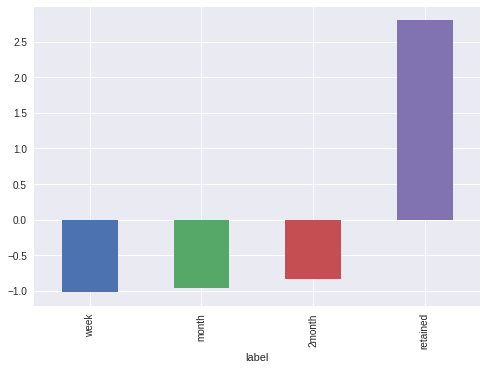

In [29]:
eda_total.loc['mean'].plot(kind = 'bar')

### - payment_amount는 라벨링 그룹별로 직관과 일치하는 경향을 띈다. 장기로 머물수록 payment를 한 총량이 많다.

In [0]:
eda_at_8 = tr_label_w_payment.groupby('label')['payment_amount_at_8'].describe()

In [0]:
eda_at_8 = eda_at_8.transpose()

In [37]:
eda_at_8

label,2month,month,retained,week
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.102078,-0.121383,0.525422,-0.132757
std,0.556044,0.418521,2.057861,0.337659
min,-0.149898,-0.149898,-0.149898,-0.149898
25%,-0.149898,-0.149898,-0.149898,-0.149898
50%,-0.149898,-0.149898,-0.149898,-0.149898
75%,-0.149898,-0.149898,-0.149898,-0.149898
max,17.428232,18.342294,32.510267,17.428232


In [0]:
eda_at_8 = eda_at_8[['week', 'month', '2month', 'retained']]

In [39]:
eda_at_8

label,week,month,2month,retained
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.132757,-0.121383,-0.102078,0.525422
std,0.337659,0.418521,0.556044,2.057861
min,-0.149898,-0.149898,-0.149898,-0.149898
25%,-0.149898,-0.149898,-0.149898,-0.149898
50%,-0.149898,-0.149898,-0.149898,-0.149898
75%,-0.149898,-0.149898,-0.149898,-0.149898
max,17.428232,18.342294,17.428232,32.510267


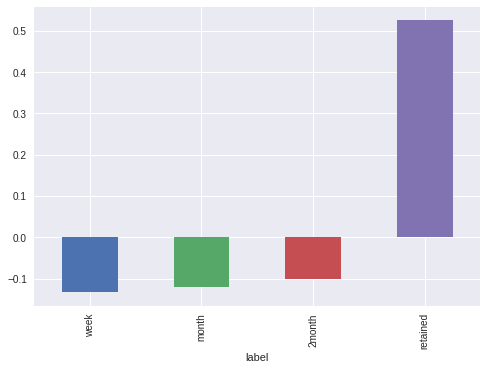

In [40]:
eda_at_8.loc['mean'].plot(kind = 'bar')

## 8주차만의 정보를 보아도 장기 존속 라벨링일수록 payment 평균이 높다.

In [0]:
#8주차만의 payment_factor도 알아봐야할 듯...